In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, scale
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

In [2]:
rdac_df = pd.read_csv('./Data/Merged Data/US_Accidents_Road.csv')
pd.set_option('display.precision',12)
rdac_df

,Severity,Distance,Side,Temperature,Wind_Chill,Humidity,Pressure,Visibility,Wind_Direction,Wind_Speed,...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,highway,oneway,length,lanes,maxspeed
0,2,0.00000000000,R,51.0,51.0,78.0,29.76,10.0,W,8.0,...,False,Night,Night,Day,Day,residential,False,455.119,2,25
1,3,1.15999996662,R,79.0,79.0,58.0,29.84,10.0,SW,9.0,...,False,Night,Night,Night,Night,residential,False,455.119,2,25
2,2,0.00000000000,L,48.0,43.0,83.0,29.86,8.0,E,12.0,...,False,Day,Day,Day,Day,residential,False,455.119,2,25
3,2,0.00000000000,L,67.0,67.0,40.0,29.64,10.0,VAR,3.0,...,False,Day,Day,Day,Day,residential,False,455.119,2,25
4,2,0.00000000000,R,56.0,56.0,85.0,30.13,10.0,CALM,0.0,...,False,Day,Day,Day,Day,residential,False,455.119,2,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57312,2,0.00000000000,R,78.0,78.0,76.0,29.82,10.0,E,5.0,...,False,Day,Day,Day,Day,tertiary,False,1560.524,2,45
57313,2,0.00000000000,L,73.0,73.0,96.0,29.52,7.0,ESE,5.0,...,False,Day,Day,Day,Day,tertiary,False,1560.524,2,45
57314,2,0.00000000000,R,66.0,66.0,86.0,29.55,10.0,ESE,5.0,...,False,Day,Day,Day,Day,tertiary,False,1560.524,2,45
57315,2,0.00000000000,R,50.0,50.0,35.0,30.09,10.0,W,3.0,...,False,Day,Day,Day,Day,tertiary,False,1560.524,2,45


Text(0, 0.5, 'Frequency / Count')

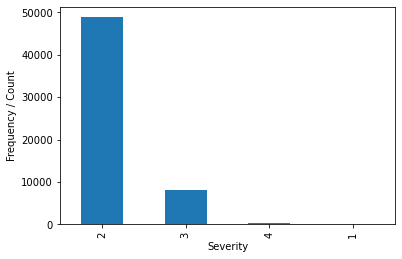

In [3]:
pd.value_counts(rdac_df['Severity']).plot.bar()
plt.xlabel('Severity')
plt.ylabel('Frequency / Count')

,Severity,Distance,Side,Temperature,Wind_Chill,Humidity,Pressure,Visibility,Wind_Direction,Wind_Speed,...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,highway,oneway,length,lanes,maxspeed
0,Minor,0.00000000000,R,51.0,51.0,78.0,29.76,10.0,W,8.0,...,False,Night,Night,Day,Day,residential,False,455.119,2,25
1,Major,1.15999996662,R,79.0,79.0,58.0,29.84,10.0,SW,9.0,...,False,Night,Night,Night,Night,residential,False,455.119,2,25
2,Minor,0.00000000000,L,48.0,43.0,83.0,29.86,8.0,E,12.0,...,False,Day,Day,Day,Day,residential,False,455.119,2,25
3,Minor,0.00000000000,L,67.0,67.0,40.0,29.64,10.0,VAR,3.0,...,False,Day,Day,Day,Day,residential,False,455.119,2,25
4,Minor,0.00000000000,R,56.0,56.0,85.0,30.13,10.0,CALM,0.0,...,False,Day,Day,Day,Day,residential,False,455.119,2,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57312,Minor,0.00000000000,R,78.0,78.0,76.0,29.82,10.0,E,5.0,...,False,Day,Day,Day,Day,tertiary,False,1560.524,2,45
57313,Minor,0.00000000000,L,73.0,73.0,96.0,29.52,7.0,ESE,5.0,...,False,Day,Day,Day,Day,tertiary,False,1560.524,2,45
57314,Minor,0.00000000000,R,66.0,66.0,86.0,29.55,10.0,ESE,5.0,...,False,Day,Day,Day,Day,tertiary,False,1560.524,2,45
57315,Minor,0.00000000000,R,50.0,50.0,35.0,30.09,10.0,W,3.0,...,False,Day,Day,Day,Day,tertiary,False,1560.524,2,45


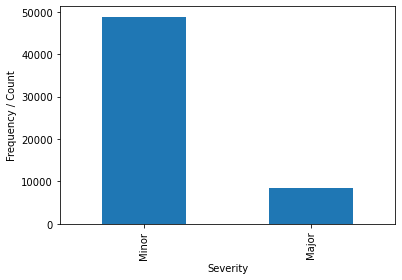

In [4]:
rdac_df['Severity'].replace({1: "Minor", 2: "Minor", 3: "Major", 4: "Major"}, inplace=True)
pd.value_counts(rdac_df['Severity']).plot.bar()
plt.xlabel('Severity')
plt.ylabel('Frequency / Count')
rdac_df

In [5]:
rdac_df['Wind_Direction'].replace({"ENE": "NE", "ESE": "SE", "East": "E", "NNE": "NE", "NNW": "NW", "North": "N",
                                   "SSE": "SE", "SSW": "SW", "South": "S", "Variable": "VAR", "WNW": "NW", "WSW": "SW",
                                   "West": "W"}, inplace = True)
rdac_df['highway'].replace({"motorway_link": "motorway", "secondary_link": "secondary"}, inplace = True)
rdac_df['Weather_Condition'].replace({"Blowing Dust / Windy":"Windy", "Blowing Snow":"Snow", "Cloudy / Windy":"Cloudy",
                                     "Drizzle and Fog":"Fog", "Fair / Windy":"Windy", "Fog / Windy":"Fog",
                                     "Haze / Windy":"Haze", "Heavy Drizzle":"Drizzle", "Heavy Rain":"Rain",
                                     "Heavy Rain / Windy":"Rain", "Heavy Snow":"Snow", "Heavy Snow / Windy":"Snow",
                                     "Heavy T-Storm":"T-Storm", "Heavy T-Storm / Windy":"T-Storm", "Ice Pellets":"Snow",
                                     "Light Drizzle":"Drizzle", "Light Drizzle / Windy":"Drizzle", "Light Freezing Drizzle":"Drizzle",
                                     "Light Freezing Fog":"Fog", "Light Freezing Rain":"Rain", "Light Ice Pellets":"Snow",
                                     "Light Rain":"Rain", "Light Rain / Windy":"Rain", "Light Rain Shower":"Rain",
                                     "Light Rain with Thunder":"Rain", "Light Sleet":"Snow", "Light Snow":"Snow",
                                     "Light Snow / Windy":"Snow", "Light Snow Grains":"Snow", "Light Snow Shower":"Snow",
                                     "Light Snow and Sleet":"Snow", "Light Snow with Thunder":"Snow",
                                     "Light Thunderstorms and Rain":"Rain", "Mostly Cloudy":"Cloudy", "Mostly Cloudy / Windy":"Cloudy",
                                     "N/A Precipitation":"Rain", "Partial Fog":"Fog", "Partly Cloudy":"Cloudy",
                                     "Partly Cloudy / Windy":"Cloudy", "Patches of Fog":"Fog", "Rain / Windy":"Rain",
                                     "Sand / Dust Whirlwinds":"Dusty", "Shallow Fog":"Fog", "Showers in the Vicinity":"Rain",
                                     "Snow / Windy":"Snow", "T-Storm / Windy":"T-Storm", "Thunder / Windy":"T-Storm",
                                     "Thunder in the Vicinity":"T-Storm", "Thunderstorms and Rain":"Rain",
                                     "Wintry Mix / Windy":"Wintry Mix", "Overcast":"Cloudy", "Scattered Clouds":"Cloudy",
                                     "Smoke":"Fog", "Thunder":"T-Storm", "Haze":"Fog"}, inplace = True)

In [6]:
sidele = LabelEncoder()
rdac_df['Side'] = sidele.fit_transform(rdac_df['Side'])
print("Side : ",sidele.classes_)
windle = LabelEncoder()
rdac_df['Wind_Direction'] = windle.fit_transform(rdac_df['Wind_Direction'])
print("Wind Direction : ",windle.classes_)
wthrle = LabelEncoder()
rdac_df['Weather_Condition'] = wthrle.fit_transform(rdac_df['Weather_Condition'])
print("Weather Condition : ",wthrle.classes_)
ssle = LabelEncoder()
rdac_df['Sunrise_Sunset'] = ssle.fit_transform(rdac_df['Sunrise_Sunset'])
print("Sunrise Sunset : ",ssle.classes_)
ctle = LabelEncoder()
rdac_df['Civil_Twilight'] = ctle.fit_transform(rdac_df['Civil_Twilight'])
print("Civil : ",ctle.classes_)
ntle = LabelEncoder()
rdac_df['Nautical_Twilight'] = ntle.fit_transform(rdac_df['Nautical_Twilight'])
print("Nautical : ",ntle.classes_)
atle = LabelEncoder()
rdac_df['Astronomical_Twilight'] = atle.fit_transform(rdac_df['Astronomical_Twilight'])
print("Astrnomical : ",atle.classes_)
highle = LabelEncoder()
rdac_df['highway'] = highle.fit_transform(rdac_df['highway'])
print("Highway Type : ",highle.classes_)
sevle = LabelEncoder()
rdac_df['Severity'] = sevle.fit_transform(rdac_df['Severity'])
print("Severity Type : ",sevle.classes_)

Side :  ['L' 'R']
Wind Direction :  ['CALM' 'E' 'N' 'NE' 'NW' 'S' 'SE' 'SW' 'VAR' 'W']
Weather Condition :  ['Clear' 'Cloudy' 'Drizzle' 'Dusty' 'Fair' 'Fog' 'Haze' 'Mist' 'Rain'
 'Snow' 'Squalls' 'T-Storm' 'Windy' 'Wintry Mix']
Sunrise Sunset :  ['Day' 'Night']
Civil :  ['Day' 'Night']
Nautical :  ['Day' 'Night']
Astrnomical :  ['Day' 'Night']
Highway Type :  ['living_street' 'motorway' 'primary' 'residential' 'secondary' 'tertiary'
 'trunk' 'unclassified']
Severity Type :  ['Major' 'Minor']


                  Severity
sev_cat                   
Minor 125 to 250     12260
Minor 75 to 125      11963
Minor above 250      12346
Minor below 75       12275
Severity Type :  ['Minor 125 to 250' 'Minor 75 to 125' 'Minor above 250' 'Minor below 75']


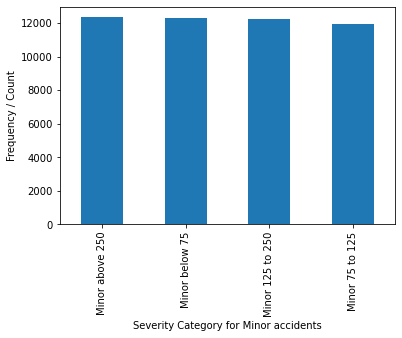

In [7]:
Minor = rdac_df[rdac_df['Severity'] == 1]
Minor = Minor.reset_index(drop=True)
sev_cat = ['Minor below 75' if score <= 75
            else 'Minor 75 to 125' if score > 75 and score <= 125 
            else 'Minor 125 to 250' if score > 125 and score <= 250
            else 'Minor above 250' if score > 250
            else 'NA'
            for score in Minor['length']]
Minor['sev_cat'] = sev_cat
print(Minor[['Severity','sev_cat']].groupby('sev_cat').count())
Minor = Minor.drop(columns = ['Severity','length'])
pd.value_counts(Minor['sev_cat']).plot.bar()
plt.xlabel('Severity Category for Minor accidents')
plt.ylabel('Frequency / Count')
Minorle = LabelEncoder()
Minor['sev_cat'] = Minorle.fit_transform(Minor['sev_cat'])
print("Severity Type : ",Minorle.classes_)

                  Severity
sev_cat                   
Major 125 to 250      2039
Major 75 to 125       1749
Major above 250       2230
Major below 75        2455
Severity Type :  ['Major 125 to 250' 'Major 75 to 125' 'Major above 250' 'Major below 75']


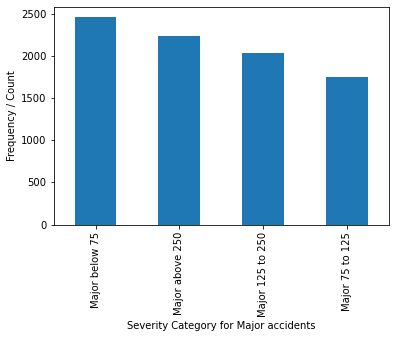

In [8]:
Major = rdac_df[rdac_df['Severity'] == 0]
Major = Major.reset_index(drop=True)
sev_cat = ['Major below 75' if score <= 75
            else 'Major 75 to 125' if score > 75 and score <= 125 
            else 'Major 125 to 250' if score > 125 and score <= 250
            else 'Major above 250' if score > 250
            else 'NA'
            for score in Major['length']]
Major['sev_cat'] = sev_cat
print(Major[['Severity','sev_cat']].groupby('sev_cat').count())
Major = Major.drop(columns = ['Severity','length'])
pd.value_counts(Major['sev_cat']).plot.bar()
plt.xlabel('Severity Category for Major accidents')
plt.ylabel('Frequency / Count')
Majorle = LabelEncoder()
Major['sev_cat'] = Majorle.fit_transform(Major['sev_cat'])
print("Severity Type : ",Majorle.classes_)

In [10]:
corr = Minor.corr()
corr.style.background_gradient(cmap='viridis')

E:\ProgramData\Anaconda3\envs\rp\lib\site-packages\pandas\io\formats\style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
E:\ProgramData\Anaconda3\envs\rp\lib\site-packages\pandas\io\formats\style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,Distance,Side,Temperature,Wind_Chill,Humidity,Pressure,Visibility,Wind_Direction,Wind_Speed,Precipitation,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,highway,oneway,lanes,maxspeed,sev_cat
Distance,1.000000000000,0.008278310742,-0.034029185666,-0.032085831443,0.016614671076,-0.033664912447,-0.006698535835,-0.005244682183,-0.003763478977,-0.000472370053,0.008188462244,-0.015569456853,-0.001369602040,-0.023903637447,0.015532864142,0.044332268124,-0.000157033907,-0.008437470765,-0.000750108173,-0.013902720762,-0.001284370205,-0.002250877616,-0.043017032695,nan,0.025981557451,0.026477826226,0.024437437640,0.018159159556,-0.002028236900,-0.000751118668,0.006045703188,0.027119897576,-0.003530948534
Side,0.008278310742,1.000000000000,0.023183053359,0.024664902566,-0.031943540094,0.002204825134,0.010611285712,-0.004699339935,-0.013006907558,0.004973622319,-0.007362446495,-0.041606742170,0.004803683859,-0.001679275491,0.010260635314,0.068265423751,-0.007620999725,0.003099629794,0.005893982581,-0.024645198674,-0.032106491569,0.003180128624,0.029338111197,nan,0.021360637198,0.022462308880,0.021913628767,0.022282921426,0.012781513210,0.003884390036,-0.009962340680,0.019825129891,0.003721680136
Temperature,-0.034029185666,0.023183053359,1.000000000000,0.994255574397,-0.419261948726,-0.039895171791,0.340552030409,0.101292810417,-0.108152826252,-0.034352074125,-0.282094943767,-0.020364828632,0.003151323121,0.003968713293,0.007546907536,-0.013093659052,-0.002969216083,0.011460169291,-0.003018472614,-0.033295601788,-0.011739749986,0.002862285631,0.011951794095,nan,-0.260826883904,-0.217981336394,-0.178045197418,-0.145744530152,0.025604958619,0.019177933897,0.006057607656,0.030862475216,-0.013457375562
Wind_Chill,-0.032085831443,0.024664902566,0.994255574397,1.000000000000,-0.401535291919,-0.046877446956,0.350790427056,0.078196515677,-0.162156675988,-0.035023581514,-0.300013252422,-0.017935371805,0.003816022510,0.006496624116,0.007588676617,-0.012943101436,-0.004751030074,0.012090710952,-0.003286941343,-0.031258264501,-0.010670677721,0.003750532664,0.010366091461,nan,-0.247343790801,-0.205691827763,-0.166767423070,-0.134605414540,0.026736405825,0.019462579459,0.008088031871,0.031454541105,-0.014988501704
Humidity,0.016614671076,-0.031943540094,-0.419261948726,-0.401535291919,1.000000000000,0.159616670168,-0.428315139764,-0.162243838055,-0.116238544259,0.070018728308,0.192286658595,0.002638566574,-0.000792018760,-0.004155831892,0.002413553071,-0.011151722844,-0.006533315220,0.010265198080,0.005474031604,0.016938310242,-0.003046387530,0.002262078891,-0.010376602976,nan,0.213503751536,0.172371509399,0.146194757188,0.122153107301,-0.007776206383,-0.020793470247,-0.003475147635,-0.041543982448,-0.014839505189
Pressure,-0.033664912447,0.002204825134,-0.039895171791,-0.046877446956,0.159616670168,1.000000000000,-0.164248680625,-0.059125941125,-0.000662997044,0.019152358344,0.084297293810,0.000211408341,-0.010011818923,-0.109898862126,0.005122019834,0.024725753240,-0.042798867785,0.015879427705,0.005246104525,0.030379610175,-0.040149609474,-0.002963179802,-0.045813265104,nan,0.027676143688,0.026767884329,0.019923610137,0.028954159940,-0.026333761094,-0.016716711351,0.008960480042,-0.030261641260,-0.029348811449
Visibility,-0.006698535835,0.010611285712,0.340552030409,0.350790427056,-0.428315139764,-0.164248680625,1.000000000000,0.079882140599,-0.058111387759,-0.101926706805,-0.439367003249,0.015664974364,0.005569238434,0.037811201925,0.009998606090,-0.011288936583,0.016349318917,0.008162927791,0.003050178916,-0.010817935174,-0.000968330580,0.005142325088,0.027095232281,nan,-0.059478925668,-0.038496555477,-0.030016921558,-0.019829931815,0.009267445907,0.011441158672,0.005988682151,0.010294656095,-0.018307429372
Wind_Direction,-0.005244682183,-0.004699339935,0.101292810417,0.078196515677,-

In [11]:
Minor = Minor.drop(columns = ['Bump','Wind_Chill','Turning_Loop','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'])
corr = Minor.corr()
corr.style.background_gradient(cmap='viridis')

,Distance,Side,Temperature,Humidity,Pressure,Visibility,Wind_Direction,Wind_Speed,Precipitation,Weather_Condition,Amenity,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,highway,oneway,lanes,maxspeed,sev_cat
Distance,1.000000000000,0.008278310742,-0.034029185666,0.016614671076,-0.033664912447,-0.006698535835,-0.005244682183,-0.003763478977,-0.000472370053,0.008188462244,-0.015569456853,-0.023903637447,0.015532864142,0.044332268124,-0.000157033907,-0.008437470765,-0.000750108173,-0.013902720762,-0.001284370205,-0.002250877616,-0.043017032695,0.025981557451,-0.002028236900,-0.000751118668,0.006045703188,0.027119897576,-0.003530948534
Side,0.008278310742,1.000000000000,0.023183053359,-0.031943540094,0.002204825134,0.010611285712,-0.004699339935,-0.013006907558,0.004973622319,-0.007362446495,-0.041606742170,-0.001679275491,0.010260635314,0.068265423751,-0.007620999725,0.003099629794,0.005893982581,-0.024645198674,-0.032106491569,0.003180128624,0.029338111197,0.021360637198,0.012781513210,0.003884390036,-0.009962340680,0.019825129891,0.003721680136
Temperature,-0.034029185666,0.023183053359,1.000000000000,-0.419261948726,-0.039895171791,0.340552030409,0.101292810417,-0.108152826252,-0.034352074125,-0.282094943767,-0.020364828632,0.003968713293,0.007546907536,-0.013093659052,-0.002969216083,0.011460169291,-0.003018472614,-0.033295601788,-0.011739749986,0.002862285631,0.011951794095,-0.260826883904,0.025604958619,0.019177933897,0.006057607656,0.030862475216,-0.013457375562
Humidity,0.016614671076,-0.031943540094,-0.419261948726,1.000000000000,0.159616670168,-0.428315139764,-0.162243838055,-0.116238544259,0.070018728308,0.192286658595,0.002638566574,-0.004155831892,0.002413553071,-0.011151722844,-0.006533315220,0.010265198080,0.005474031604,0.016938310242,-0.003046387530,0.002262078891,-0.010376602976,0.213503751536,-0.007776206383,-0.020793470247,-0.003475147635,-0.041543982448,-0.014839505189
Pressure,-0.033664912447,0.002204825134,-0.039895171791,0.159616670168,1.000000000000,-0.164248680625,-0.059125941125,-0.000662997044,0.019152358344,0.084297293810,0.000211408341,-0.109898862126,0.005122019834,0.024725753240,-0.042798867785,0.015879427705,0.005246104525,0.030379610175,-0.040149609474,-0.002963179802,-0.045813265104,0.027676143688,-0.026333761094,-0.016716711351,0.008960480042,-0.030261641260,-0.029348811449
Visibility,-0.006698535835,0.010611285712,0.340552030409,-0.428315139764,-0.164248680625,1.000000000000,0.079882140599,-0.058111387759,-0.101926706805,-0.439367003249,0.015664974364,0.037811201925,0.009998606090,-0.011288936583,0.016349318917,0.008162927791,0.003050178916,-0.010817935174,-0.000968330580,0.005142325088,0.027095232281,-0.059478925668,0.009267445907,0.011441158672,0.005988682151,0.010294656095,-0.018307429372
Wind_Direction,-0.005244682183,-0.004699339935,0.101292810417,-0.162243838055,-0.059125941125,0.079882140599,1.000000000000,0.394523274331,-0.005506094209,-0.042886208975,0.027922761328,0.009073934408,0.006656265623,-0.010689076014,-0.007800209498,0.001301210150,0.004779082370,0.014701387941,-0.002301244938,-0.009591872802,0.029576345343,-0.113942036370,-0.004589300920,0.006049540435,-0.002641818722,-0.006511484138,0.013642725569
Wind_Speed,-0.003763478977,-0.013006907558,-0.108152826252,-0.116238544259,-0.000662997044,-0.058111387759,0.394523274331,1.000000000000,0.025389237616,0.116060137664,0.001310877193,0.005780179741,0.011495462027,-0.006836422867,0.011360004219,0.001016372524,0.004466242390,0.019207382415,0.009079319587,-0.008022355992,0.037914723291,-0.116768967731,-0.021707006325,0.001071983812,-0.017336789114,-0.019102441038,0.011648692335
Precipitation,-0.000472370053,0.004973622319,-0.034352074125,0.070018728308,0.019152358344,-0.101926706805,-0.005506094209,0.025389237616,1.000000000000,0.087178673949,0.001659329817,-0.001773783215,-0.000953716882,-0.001975329270,-0.000935421567,-0.001335222459,-0.000514825510,-0.001742200859,-0.

In [12]:
clf = RandomForestClassifier(random_state=5)
x = Minor.loc[:, Minor.columns != 'sev_cat'].to_numpy()
y = Minor['sev_cat'].to_numpy()
clf.fit(x, y)

RandomForestClassifier(random_state=5)

Pressure             0.143719685831
Temperature          0.122325362338
Humidity             0.119287684400
maxspeed             0.110292905714
Wind_Speed           0.084368687401
lanes                0.074317419606
Wind_Direction       0.068844236905
highway              0.064823694663
Weather_Condition    0.035906597852
Visibility           0.033381741895
Side                 0.023654261617
Sunrise_Sunset       0.018971697545
Traffic_Signal       0.017836567266
oneway               0.015524930951
Precipitation        0.015036035137
Crossing             0.013800376829
Distance             0.013592962300
Station              0.006487919434
Amenity              0.005841488679
Stop                 0.004960851675
Railway              0.002840005380
Junction             0.002593835129
Give_Way             0.001008503643
No_Exit              0.000406172052
Traffic_Calming      0.000165934722
Roundabout           0.000010441038
dtype: float64


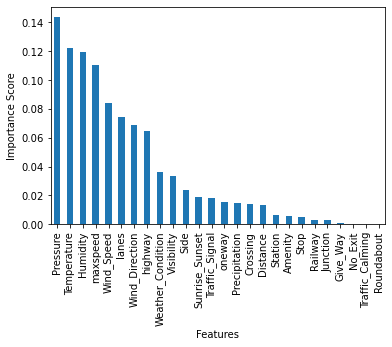

In [14]:
feature_imp = pd.Series(clf.feature_importances_,index=Minor.loc[:, Minor.columns != 'sev_cat'].columns).sort_values(ascending=False)
feature_imp.plot(kind = 'bar')
plt.xlabel('Features')
plt.ylabel('Importance Score')
print(feature_imp)

In [15]:
Minor = Minor.drop(columns = ['Junction','Amenity','Station','Stop','Railway','Give_Way','No_Exit','Traffic_Calming','Roundabout'])
Minor

,Distance,Side,Temperature,Humidity,Pressure,Visibility,Wind_Direction,Wind_Speed,Precipitation,Weather_Condition,Crossing,Traffic_Signal,Sunrise_Sunset,highway,oneway,lanes,maxspeed,sev_cat
0,0.0,1,51.0,78.0,29.76,10.0,9,8.0,0.00,1,True,False,1,3,False,2,25,2
1,0.0,0,48.0,83.0,29.86,8.0,1,12.0,0.02,8,False,False,0,3,False,2,25,2
2,0.0,0,67.0,40.0,29.64,10.0,8,3.0,0.00,1,False,True,0,3,False,2,25,2
3,0.0,1,56.0,85.0,30.13,10.0,0,0.0,0.00,4,True,False,0,3,False,2,25,2
4,0.0,1,44.0,85.0,29.88,10.0,0,0.0,0.00,1,False,False,1,3,False,2,25,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48839,0.0,1,78.0,76.0,29.82,10.0,1,5.0,0.00,4,False,True,0,5,False,2,45,2
48840,0.0,0,73.0,96.0,29.52,7.0,6,5.0,0.00,1,False,False,0,5,False,2,45,2
48841,0.0,1,66.0,86.0,29.55,10.0,6,5.0,0.00,1,False,False,0,5,False,2,45,2
48842,0.0,1,50.0,35.0,30.09,10.0,9,3.0,0.00,4,False,False,0,5,False,2,45,2


In [16]:
corr = Major.corr()
corr.style.background_gradient(cmap='viridis')

E:\ProgramData\Anaconda3\envs\rp\lib\site-packages\pandas\io\formats\style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
E:\ProgramData\Anaconda3\envs\rp\lib\site-packages\pandas\io\formats\style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,Distance,Side,Temperature,Wind_Chill,Humidity,Pressure,Visibility,Wind_Direction,Wind_Speed,Precipitation,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,highway,oneway,lanes,maxspeed,sev_cat
Distance,1.000000000000,-0.026324759473,-0.015020516398,-0.015792178130,-0.001803624061,-0.039641645369,-0.002438322948,0.001081787040,0.007912084195,-0.009470242374,0.008165249528,-0.030613144424,nan,-0.022931859719,0.005929195653,-0.019158357134,0.001218051934,-0.015398618932,nan,-0.008462718524,0.014774181972,-0.003050818679,-0.010634331004,nan,0.024008088673,0.022736265099,0.016381875091,0.027358281318,-0.032585616891,-0.041534336335,0.047418216951,0.024089744250,-0.041044548587
Side,-0.026324759473,1.000000000000,-0.037857527108,-0.042850454780,0.033115774991,0.129881185033,-0.086806116611,0.017991525396,-0.006484429269,0.013820339853,0.058479298446,0.047397764557,nan,0.037591992311,0.011308434577,0.079597771716,0.008419526198,0.033581965383,nan,-0.025843394848,-0.046367410612,0.010870845111,0.007875253639,nan,0.018878128737,0.024188476636,0.030930590702,0.030248875396,-0.080110529946,-0.005973804991,0.065296338272,0.086687424882,0.029893790758
Temperature,-0.015020516398,-0.037857527108,1.000000000000,0.994603869725,-0.475547516283,-0.122169821021,0.444518059421,0.118980186635,-0.151699195896,-0.037383494705,-0.364803042865,0.012586265970,nan,0.014765634603,0.017915393584,-0.008505353640,-0.002535936048,0.029597627034,nan,-0.006092473210,0.010936492366,0.013779365479,0.035688893839,nan,-0.289276247260,-0.246043445977,-0.213405790699,-0.179618147000,0.010821716184,0.044333065530,-0.008012156485,0.057340518993,0.002163778525
Wind_Chill,-0.015792178130,-0.042850454780,0.994603869725,1.000000000000,-0.460907029665,-0.126310145884,0.458042916372,0.104205109221,-0.207235132106,-0.039925415669,-0.384186004727,0.016003905787,nan,0.020249893984,0.019014446133,-0.008486878198,-0.001392489826,0.033815249034,nan,-0.006513454329,0.014463048979,0.014282102143,0.036102655407,nan,-0.274561203903,-0.233606788659,-0.199772187175,-0.165420090824,0.009785301997,0.043149632108,-0.005691683401,0.054411634490,0.003811123879
Humidity,-0.001803624061,0.033115774991,-0.475547516283,-0.460907029665,1.000000000000,0.244805207182,-0.506234754811,-0.177317084738,-0.063396618204,0.065297407905,0.286740313028,-0.008599934189,nan,-0.021086128515,0.004917740741,-0.008356326102,-0.013446751192,-0.047393365096,nan,-0.012574339608,-0.023523795552,0.006475006168,-0.008043673459,nan,0.236304764806,0.206971655869,0.188588431526,0.171645429842,-0.015197105992,-0.052460734380,0.020984182867,-0.070666116970,-0.063237632537
Pressure,-0.039641645369,0.129881185033,-0.122169821021,-0.126310145884,0.244805207182,1.000000000000,-0.258065258339,-0.002547381176,-0.017444552283,0.021223823540,0.112877715229,0.051964798723,nan,-0.011918489265,-0.001266439900,0.050357868488,-0.031204181416,0.038956571790,nan,-0.007925411431,0.002179613062,0.013004166645,0.053838380688,nan,0.068318717669,0.054424503610,0.042818997859,0.036090949478,-0.126063619456,-0.076986353446,0.033518087895,0.001198352312,-0.089392240944
Visibility,-0.002438322948,-0.086806116611,0.444518059421,0.458042916372,-0.506234754811,-0.258065258339,1.000000000000,0.119046725605,-0.107480375907,-0.079459534902,-0.536495013956,0.020068429424,nan,0.058974301877,-0.000064288599,0.000326716239,0.008546605765,0.034682747855,nan,0.016583076239,0.011324096472,-0.001421097444,0.022034977419,nan,-0.068804071696,-0.055588368667,-0.052537957002,-0.037767200900,0.007761218863,-0.005311775614,-0.002754802330,-0.000366244387,0.030201748629
Wind_Direction,0.001081787040,0.017991525396,0.118980186635,0.104205109221,-0.177317084738,-0.002547381176,0.119046725605,1.000000000000,0.283959411871,-0.007242420328,-0.052411215235,0.029542092987,nan,0.003299586736,0.006371371710,0.03344

In [17]:
Major = Major.drop(columns = ['Wind_Chill','Turning_Loop','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight','Roundabout','Bump'])
corr = Major.corr()
corr.style.background_gradient(cmap='viridis')

,Distance,Side,Temperature,Humidity,Pressure,Visibility,Wind_Direction,Wind_Speed,Precipitation,Weather_Condition,Amenity,Crossing,Give_Way,Junction,No_Exit,Railway,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,highway,oneway,lanes,maxspeed,sev_cat
Distance,1.000000000000,-0.026324759473,-0.015020516398,-0.001803624061,-0.039641645369,-0.002438322948,0.001081787040,0.007912084195,-0.009470242374,0.008165249528,-0.030613144424,-0.022931859719,0.005929195653,-0.019158357134,0.001218051934,-0.015398618932,-0.008462718524,0.014774181972,-0.003050818679,-0.010634331004,0.024008088673,-0.032585616891,-0.041534336335,0.047418216951,0.024089744250,-0.041044548587
Side,-0.026324759473,1.000000000000,-0.037857527108,0.033115774991,0.129881185033,-0.086806116611,0.017991525396,-0.006484429269,0.013820339853,0.058479298446,0.047397764557,0.037591992311,0.011308434577,0.079597771716,0.008419526198,0.033581965383,-0.025843394848,-0.046367410612,0.010870845111,0.007875253639,0.018878128737,-0.080110529946,-0.005973804991,0.065296338272,0.086687424882,0.029893790758
Temperature,-0.015020516398,-0.037857527108,1.000000000000,-0.475547516283,-0.122169821021,0.444518059421,0.118980186635,-0.151699195896,-0.037383494705,-0.364803042865,0.012586265970,0.014765634603,0.017915393584,-0.008505353640,-0.002535936048,0.029597627034,-0.006092473210,0.010936492366,0.013779365479,0.035688893839,-0.289276247260,0.010821716184,0.044333065530,-0.008012156485,0.057340518993,0.002163778525
Humidity,-0.001803624061,0.033115774991,-0.475547516283,1.000000000000,0.244805207182,-0.506234754811,-0.177317084738,-0.063396618204,0.065297407905,0.286740313028,-0.008599934189,-0.021086128515,0.004917740741,-0.008356326102,-0.013446751192,-0.047393365096,-0.012574339608,-0.023523795552,0.006475006168,-0.008043673459,0.236304764806,-0.015197105992,-0.052460734380,0.020984182867,-0.070666116970,-0.063237632537
Pressure,-0.039641645369,0.129881185033,-0.122169821021,0.244805207182,1.000000000000,-0.258065258339,-0.002547381176,-0.017444552283,0.021223823540,0.112877715229,0.051964798723,-0.011918489265,-0.001266439900,0.050357868488,-0.031204181416,0.038956571790,-0.007925411431,0.002179613062,0.013004166645,0.053838380688,0.068318717669,-0.126063619456,-0.076986353446,0.033518087895,0.001198352312,-0.089392240944
Visibility,-0.002438322948,-0.086806116611,0.444518059421,-0.506234754811,-0.258065258339,1.000000000000,0.119046725605,-0.107480375907,-0.079459534902,-0.536495013956,0.020068429424,0.058974301877,-0.000064288599,0.000326716239,0.008546605765,0.034682747855,0.016583076239,0.011324096472,-0.001421097444,0.022034977419,-0.068804071696,0.007761218863,-0.005311775614,-0.002754802330,-0.000366244387,0.030201748629
Wind_Direction,0.001081787040,0.017991525396,0.118980186635,-0.177317084738,-0.002547381176,0.119046725605,1.000000000000,0.283959411871,-0.007242420328,-0.052411215235,0.029542092987,0.003299586736,0.006371371710,0.033445251801,-0.001294222993,0.037707488248,-0.006190475256,0.006017023080,-0.001076879497,0.001334773998,-0.097195714665,-0.014745178534,0.012916660876,-0.012379327118,-0.002991407317,-0.005039476097
Wind_Speed,0.007912084195,-0.006484429269,-0.151699195896,-0.063396618204,-0.017444552283,-0.107480375907,0.283959411871,1.000000000000,0.042124801560,0.173278563732,-0.062751228694,-0.025576536357,0.011649197031,-0.041594638407,-0.000327343589,-0.036499614668,0.017166125334,-0.014370339561,-0.016497421086,0.028841812746,-0.121126300320,0.022700387937,-0.005288439501,-0.048331782063,-0.025283383275,-0.010392256514
Precipitation,-0.009470242374,0.013820339853,-0.037383494705,0.065297407905,0.021223823540,-0.079459534902,-0.007242420328,0.042124801560,1.000000000000,0.065848994504,-0.007393586051,0.021800846221,-0.002996578371,0.048970845374,-0.001417792634,-0.006731272900,-0.006128591703,-0.000136881370,-0.001830578557,0.039331464150,-0.001964057750,-0.007289007223,0.011272229490,-0.016889856897,-0.015829519375,0.000300477186
Weather_Con

In [18]:
clf = RandomForestClassifier(random_state=5)
x = Major.loc[:, Major.columns != 'sev_cat'].to_numpy()
y = Major['sev_cat'].to_numpy()
clf.fit(x, y)

RandomForestClassifier(random_state=5)

Pressure             0.132211712920
maxspeed             0.109649881411
Temperature          0.105426116994
Humidity             0.097694909420
lanes                0.082673347244
highway              0.077893385948
Wind_Speed           0.075598252176
Wind_Direction       0.062712411156
Distance             0.050267271657
Visibility           0.035869765576
Weather_Condition    0.034314142436
oneway               0.023105265354
Side                 0.020749981461
Precipitation        0.019392665393
Sunrise_Sunset       0.018021718055
Traffic_Signal       0.014058735439
Junction             0.010158088244
Crossing             0.009566243149
Amenity              0.008937705868
Railway              0.004811504377
Station              0.004516776094
Stop                 0.001565828240
Give_Way             0.000495415224
No_Exit              0.000187288232
Traffic_Calming      0.000121587932
dtype: float64


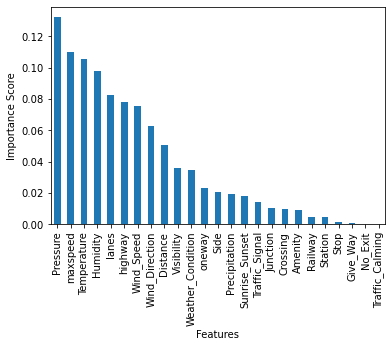

In [19]:
feature_imp = pd.Series(clf.feature_importances_,index=Major.loc[:, Major.columns != 'sev_cat'].columns).sort_values(ascending=False)
feature_imp.plot(kind = 'bar')
plt.xlabel('Features')
plt.ylabel('Importance Score')
print(feature_imp)

In [18]:
Major = Major.drop(columns = ['Crossing','Amenity','Railway','Station','Stop','Give_Way','No_Exit','Traffic_Calming'])
Major

,Distance,Side,Temperature,Humidity,Pressure,Visibility,Wind_Direction,Wind_Speed,Precipitation,Weather_Condition,Junction,Traffic_Signal,Sunrise_Sunset,highway,oneway,lanes,maxspeed,sev_cat
0,1.159999966620,1,79.0,58.0,29.84,10.0,7,9.0,0.00,1,False,False,1,3,False,2,25,2
1,0.349999994040,1,36.0,62.0,25.68,10.0,0,0.0,0.00,4,False,False,0,7,False,2,25,3
2,0.349999994040,1,57.0,62.0,25.67,10.0,0,0.0,0.00,4,False,False,0,7,False,2,25,3
3,0.349999994040,1,67.0,49.0,25.67,10.0,0,0.0,0.00,4,False,False,0,7,False,2,25,3
4,0.349999994040,1,89.0,18.0,25.66,10.0,9,12.0,0.00,1,False,False,0,7,False,2,25,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8468,0.140000000596,0,83.0,74.0,29.75,9.0,0,0.0,0.00,1,False,False,0,3,False,3,30,3
8469,0.000000000000,1,26.1,92.0,30.04,2.5,4,6.9,0.01,1,False,False,0,2,True,2,55,2
8470,0.000000000000,0,61.0,60.0,29.78,8.0,0,0.0,0.00,4,False,True,1,4,True,2,40,2
8471,0.000000000000,0,54.0,72.0,29.91,10.0,7,6.0,0.00,1,False,True,1,4,True,2,40,2


In [19]:
Minor_col = list(Minor.columns)
Minor_col.sort()
Major_col = list(Major.columns)
Major_col.sort()
Accident_col = pd.DataFrame({"Major_Accidents":Major_col,"Minor_Accidents":Minor_col})
Accident_col

,Major_Accidents,Minor_Accidents
0,Distance,Crossing
1,Humidity,Distance
2,Junction,Humidity
3,Precipitation,Precipitation
4,Pressure,Pressure
5,Side,Side
6,Sunrise_Sunset,Sunrise_Sunset
7,Temperature,Temperature
8,Traffic_Signal,Traffic_Signal
9,Visibility,Visibility


In [20]:
Major.describe()

,Distance,Side,Temperature,Humidity,Pressure,Visibility,Wind_Direction,Wind_Speed,Precipitation,Weather_Condition,Sunrise_Sunset,highway,lanes,maxspeed,sev_cat
count,8473.000000000000,8473.000000000000,8473.000000000000,8473.000000000000,8473.000000000000,8473.000000000000,8473.000000000000,8473.000000000000,8473.000000000000,8473.000000000000,8473.000000000000,8473.000000000000,8473.000000000000,8473.000000000000,8473.000000000000
mean,0.448067744737,0.833234981707,58.457040009442,68.622329753334,29.483070931193,8.405360557064,4.520830874543,8.094653605571,0.012020535820,3.868759589284,0.278649828868,3.589165584799,2.539950430780,31.657028207247,1.602029977576
std,1.832565666735,0.372787940494,20.709450186470,20.933066628459,1.033254019374,3.511667453034,2.726660190933,5.442242313037,0.159571623347,2.959277848595,0.448361268885,1.215403450615,1.139301695989,8.935526884032,1.140405489052
min,0.000000000000,0.000000000000,-7.100000000000,3.000000000000,20.680000000000,0.000000000000,0.000000000000,0.000000000000,0.000000000000,0.000000000000,0.000000000000,1.000000000000,1.000000000000,5.000000000000,0.000000000000
25%,0.000000000000,1.000000000000,42.000000000000,53.000000000000,29.340000000000,8.000000000000,3.000000000000,5.000000000000,0.000000000000,1.000000000000,0.000000000000,3.000000000000,2.000000000000,25.000000000000,1.000000000000
50%,0.000000000000,1.000000000000,62.000000000000,72.000000000000,29.750000000000,10.000000000000,4.000000000000,7.000000000000,0.000000000000,4.000000000000,0.000000000000,3.000000000000,2.000000000000,30.000000000000,2.000000000000
75%,0.010000000000,1.000000000000,75.000000000000,86.000000000000,29.960000000000,10.000000000000,7.000000000000,11.500000000000,0.000000000000,4.000000000000,1.000000000000,4.000000000000,3.000000000000,35.000000000000,3.000000000000
max,51.049999237100,1.000000000000,112.000000000000,100.000000000000,31.080000000000,50.000000000000,9.000000000000,47.000000000000,9.990000000000,13.000000000000,1.000000000000,7.000000000000,7.000000000000,75.000000000000,3.000000000000


In [21]:
Minor.describe()

,Distance,Side,Temperature,Humidity,Pressure,Visibility,Wind_Direction,Wind_Speed,Precipitation,Weather_Condition,Sunrise_Sunset,highway,lanes,maxspeed,sev_cat
count,48844.000000000000,48844.000000000000,48844.000000000000,48844.000000000000,48844.000000000000,48844.000000000000,48844.000000000000,48844.000000000000,48844.000000000000,48844.000000000000,48844.00000000000,48844.000000000000,48844.000000000000,48844.000000000000,48844.000000000000
mean,0.056154737497,0.638747850299,61.819498812546,68.267443288838,29.473548030464,8.816622512489,4.291130947506,7.296462206208,0.006306199328,3.493939890263,0.21928998444,3.659548767505,2.456207517812,31.401605110147,1.504381295553
std,0.586725959001,0.480368356929,19.437704804416,21.093255853612,0.851230356195,3.040680491636,2.802444808539,5.212149404627,0.096002034184,2.619106335878,0.41376973344,1.242924297050,1.040538665767,8.634471857367,1.120104221253
min,0.000000000000,0.000000000000,-10.000000000000,2.000000000000,20.460000000000,0.000000000000,0.000000000000,0.000000000000,0.000000000000,0.000000000000,0.00000000000,0.000000000000,1.000000000000,5.000000000000,0.000000000000
25%,0.000000000000,0.000000000000,47.000000000000,53.000000000000,29.230000000000,10.000000000000,2.000000000000,3.000000000000,0.000000000000,1.000000000000,0.00000000000,3.000000000000,2.000000000000,25.000000000000,0.000000000000
50%,0.000000000000,1.000000000000,65.000000000000,72.000000000000,29.660000000000,10.000000000000,4.000000000000,7.000000000000,0.000000000000,4.000000000000,0.00000000000,3.000000000000,2.000000000000,30.000000000000,2.000000000000
75%,0.000000000000,1.000000000000,77.000000000000,86.000000000000,29.920000000000,10.000000000000,7.000000000000,10.000000000000,0.000000000000,4.000000000000,0.00000000000,5.000000000000,3.000000000000,35.000000000000,3.000000000000
max,25.540000915500,1.000000000000,112.000000000000,100.000000000000,30.800000000000,80.000000000000,9.000000000000,58.000000000000,9.990000000000,13.000000000000,1.00000000000,7.000000000000,7.000000000000,75.000000000000,3.000000000000


In [22]:
Minor['Side'] = sidele.inverse_transform(Minor['Side'])
print("Side : ",sidele.classes_)
Minor['Wind_Direction'] = windle.inverse_transform(Minor['Wind_Direction'])
print("Wind Direction : ",windle.classes_)
Minor['Weather_Condition'] = wthrle.inverse_transform(Minor['Weather_Condition'])
print("Weather Condition : ",wthrle.classes_)
Minor['Sunrise_Sunset'] = ssle.inverse_transform(Minor['Sunrise_Sunset'])
print("Sunrise Sunset : ",ssle.classes_)
Minor['highway'] = highle.inverse_transform(Minor['highway'])
print("Highway Type : ",highle.classes_)
Minor['sev_cat'] = Minorle.inverse_transform(Minor['sev_cat'])
print("Severity Type : ",Minorle.classes_)

Side :  ['L' 'R']
Wind Direction :  ['CALM' 'E' 'N' 'NE' 'NW' 'S' 'SE' 'SW' 'VAR' 'W']
Weather Condition :  ['Clear' 'Cloudy' 'Drizzle' 'Dusty' 'Fair' 'Fog' 'Haze' 'Mist' 'Rain'
 'Snow' 'Squalls' 'T-Storm' 'Windy' 'Wintry Mix']
Sunrise Sunset :  ['Day' 'Night']
Highway Type :  ['living_street' 'motorway' 'primary' 'residential' 'secondary' 'tertiary'
 'trunk' 'unclassified']
Severity Type :  ['Minor 125 to 250' 'Minor 75 to 125' 'Minor above 250' 'Minor below 75']


In [23]:
Major['Side'] = sidele.inverse_transform(Major['Side'])
print("Side : ",sidele.classes_)
Major['Wind_Direction'] = windle.inverse_transform(Major['Wind_Direction'])
print("Wind Direction : ",windle.classes_)
Major['Weather_Condition'] = wthrle.inverse_transform(Major['Weather_Condition'])
print("Weather Condition : ",wthrle.classes_)
Major['Sunrise_Sunset'] = ssle.inverse_transform(Major['Sunrise_Sunset'])
print("Sunrise Sunset : ",ssle.classes_)
Major['highway'] = highle.inverse_transform(Major['highway'])
print("Highway Type : ",highle.classes_)
Major['sev_cat'] = Majorle.inverse_transform(Major['sev_cat'])
print("Severity Type : ",Majorle.classes_)

Side :  ['L' 'R']
Wind Direction :  ['CALM' 'E' 'N' 'NE' 'NW' 'S' 'SE' 'SW' 'VAR' 'W']
Weather Condition :  ['Clear' 'Cloudy' 'Drizzle' 'Dusty' 'Fair' 'Fog' 'Haze' 'Mist' 'Rain'
 'Snow' 'Squalls' 'T-Storm' 'Windy' 'Wintry Mix']
Sunrise Sunset :  ['Day' 'Night']
Highway Type :  ['living_street' 'motorway' 'primary' 'residential' 'secondary' 'tertiary'
 'trunk' 'unclassified']
Severity Type :  ['Major 125 to 250' 'Major 75 to 125' 'Major above 250' 'Major below 75']


In [24]:
Major.to_csv('./Data/Feature Selected Data/US_Accidents_Road_DR_PS_Major.csv', index = False)
Minor.to_csv('./Data/Feature Selected Data/US_Accidents_Road_DR_PS_Minor.csv', index = False)